In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Exercise 1: Linear regression to analyse relationships between house prices and other variables
We will use regression to explore a house prices dataset. Note that we're not doing prediction (for the sake of it), we're using it to help us analyse data.

## Simple Linear Regression
We will use regression to help determine if there is a relationship between floor area and price and how much of the variation in price is due to floor area.

1. **Get the data**. Download [train.csv](https://staff.city.ac.uk/~sbbb717/moodle/2020-2021/inm430/session05/train.csv) training houseprice data (which came from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)) and load into a Pandas data frame.
2. **Find your variables**. Look at the data and check the [documentation](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) to identify a column that indicates price and one that indicates area. `GrLivArea` and `SalePrice` are good ones to use.
3. **Check out your variables**. Create a scatterplot to see if there's appears to be a relationship between these two variables. Tips: Use transparency and zoom in on the details by removing the outliers from the scatterplot using a Pandas filter, setting the scale of the axes or using an interactive plot. Does there appear to be a relationship? Also, plot the distributions (histgrams and/or box plots).
4. **Build a simple linear regression model**. Assuming you think there's a relationship (there is!), build a regression model that predicts price from floor area in order to see how the variation in price can be explained by floor area. Use the [SciKit-Learn's example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html). Determine your independent variable (x) and dependent variable (y), create a new linear model object and use its [fit()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit) function to fit the model and extract the two parameters (intersept and slope). Interpret these - what do they tell you about the relationship between floor area and price? Tip, `fit()` needs a list of 1 independent variable - you can use double square brackets like this: `dataframe[['VARNAME']]`
5. **Quantify the variation in price due to floor area**. Use the `score()` function to get the R2 value. How much of the variation is explained by floor area?
6. **Predict price from floor area using this model and compare with observed**. Add a new column of predicted prices using LinearRegression's `predict()` function. Plot a scatterplot with the floorspace vs price and floorspace vs predicted price on the same axis with different coloured dots. How's the model look?
7. **Calculate residuals**. Add a new column of residuals (observed minus predicted values). Look at the means and distributions and comment on the effect size - does it predict within a reasonable margin?

In [23]:
housedata = pd.read_csv("train.csv", header = 0)
housedata

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


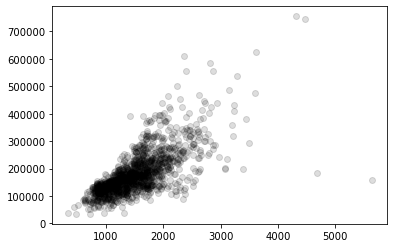

In [24]:
plt.scatter(housedata['GrLivArea'], housedata['SalePrice'], c='#00000022', label=housedata['BldgType'])
plt.show()

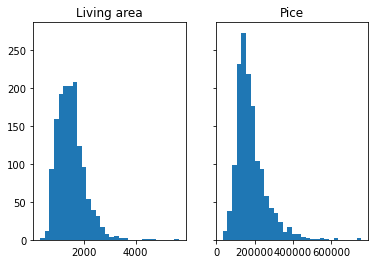

In [12]:
fig, axes = plt.subplots(ncols=2, sharey=True)
axes[0].hist(housedata['GrLivArea'], bins=30)
axes[0].set_title('Living area')
axes[1].hist(housedata['SalePrice'], bins=30)
axes[1].set_title('Pice')
plt.show()

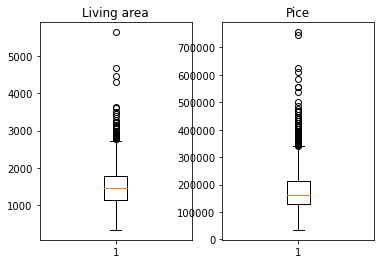

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.boxplot(housedata['GrLivArea'])
ax1.set_title('Living area')
ax2.boxplot(housedata['SalePrice'])
ax2.set_title('Pice')
plt.show()

The distributions are both a bit skewed to the left and have high outliers, but are quite nice distributions. The scatterplot has a funnel-like structure which suggests that the "homoscedasticity" assumption (residuals have same variance across all value) may not be quite met.

In [17]:
# Create linear regression object
model = LinearRegression()

# Fit the model
model.fit(housedata[['GrLivArea']], housedata['SalePrice'])

LinearRegression()

In [18]:
model.intercept_

18569.025856487133

In [19]:
model.coef_

array([107.13035897])

The intercept is the fixed portion of price that's not affected by the floor area.

The slope is the multiplier describing how an increase in one unit of floor area (sq ft) increased the price in \\$. So the model says that a 1 sq ft increase floor area  will increase its price by 107\\$.

In [20]:
# Calculate the R_squared of the model
r_sq = model.score(housedata[['GrLivArea']],housedata['SalePrice'])
r_sq

0.5021486502718042

The R<sup>2</sup> (R-Squared) tells us that half of the variation is captured by the model (i.e. can be explained with a linear model based on floor area.

In [21]:
# Create predict column
housedata['pred'] = model.predict(housedata[['GrLivArea']])
housedata

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,pred
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,201761.939688
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,153767.538871
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,209903.846969
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,202511.852201
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,254041.554863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,195012.727073
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,240650.259993
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,269254.065837
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125,134055.552822


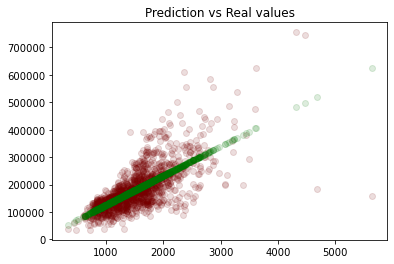

In [23]:
plt.scatter(housedata['GrLivArea'], housedata['SalePrice'], c="#77000022")
plt.scatter(housedata['GrLivArea'], housedata['pred'], c="#00770022")
plt.title('Prediction vs Real values')
plt.show();

In [24]:
# Get a residual column
housedata['resid'] = housedata['pred'] - housedata['SalePrice']
housedata

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,pred,resid
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,2,2008,WD,Normal,208500,201761.939688,-6738.060312
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2007,WD,Normal,181500,153767.538871,-27732.461129
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,9,2008,WD,Normal,223500,209903.846969,-13596.153031
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,202511.852201,62511.852201
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,12,2008,WD,Normal,250000,254041.554863,4041.554863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,8,2007,WD,Normal,175000,195012.727073,20012.727073
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,MnPrv,NaN,0,2,2010,WD,Normal,210000,240650.259993,30650.259993
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,GdPrv,Shed,2500,5,2010,WD,Normal,266500,269254.065837,2754.065837
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,4,2010,WD,Normal,142125,134055.552822,-8069.447178


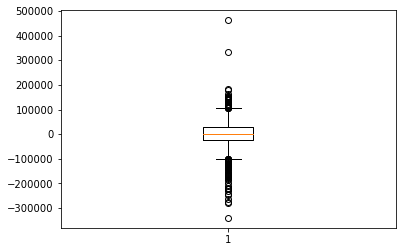

In [27]:
plt.boxplot(housedata['resid'])
plt.show()

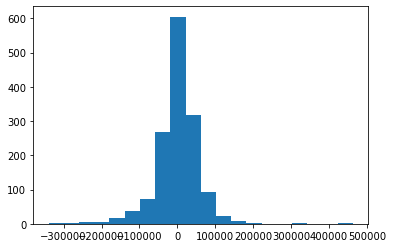

In [29]:
plt.hist(housedata['resid'], bins=20);

In [30]:
housedata['resid'].describe()

count    1.460000e+03
mean    -1.085413e-11
std      5.605350e+04
min     -3.398318e+05
25%     -2.195731e+04
50%      1.123619e+03
75%      2.980000e+04
max      4.629985e+05
Name: resid, dtype: float64

In [31]:
print("Mean {:.12f}".format(housedata['resid'].mean())) #More readable number
print("Standard devation {:.12f}".format(housedata['resid'].std())) #More readable number
print("Mean price {:.12f}".format(housedata['SalePrice'].mean()))
print("Median price {:.12f}".format(housedata['SalePrice'].median()))

Mean -0.000000000011
Standard devation 56053.503558790180
Mean price 180921.195890410949
Median price 163000.000000000000


The residuals are normally distributed with a mean of zero. This is a good sign as it demonstrates that some of the key assumptions are not violated.

In terms of effect size, the standard deviation is 56053 US dollars which is quite large compared to the mean price. Perhaps not the most useful predictive model, but it's helping us analyse the data.

## Multiple linear regression
Try to account for more of that variation.
1. **Find the top correlated numerical variables**. Find the top correlations between the price and the numerical variables.

In [ ]:
numeric_features = housedata.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:10], '\n') #top 10

2. **Choose another variable to add to the model**. Choose another variable to find to account for more of the variation. Choose a highly correlated variable but check it's not too correlated to your floor area variable (correlation of <0.5 should be OK). Also check that it seems a reasonable predictor variable.
3. **Create a new model with two independent variables** Create a new model with two independent variables with one you used before and the one you just selected.
4. **Check the R<sup>2<sup>**. Does the model capture more of the variation?
5. **Check the parameters**. Try to interpret the parameters. There are two slopes now, one for each variable. Also, note that these variables are in different units, so this affects the interpretation of these parameters (they can't be compared to each other unless you normalise the variables). These are tricky to interpret because they interact with each other.
6. **Study residuals**. See how the residuals vary by some category e.g. `Neighborhood`. This will tell which types of house are poorly modelled and this may give some clues for our analysis. For example, we might model some subsets separately or exclude some subset for our analysis.

In [35]:
# Select  columns with number values
numeric_features = housedata.select_dtypes(include=[np.number])

# Create correlation table
corr = numeric_features.corr()
corr.head(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,pred,resid
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917,0.008273,0.039370
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284,0.074853,0.194628
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799,0.402797,-0.109107
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843,0.263116,-0.109686
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982,0.593007,-0.525467


In [36]:
corr['SalePrice'].sort_values(ascending=False)[:10]

SalePrice       1.000000
OverallQual     0.790982
pred            0.708624
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64

There are some strong correlations with price, so good candidates. However we want to find a variable that doesn't correlate strongly with GrLivArea because we want to capture other variation.

In [37]:
corr['SalePrice'].loc['GarageCars']

0.6404091972583519

`GarageCars` seems a good candidate.

In [38]:
# Create new model with two independent values
# Create new linear regression object
model1 = LinearRegression()

# Fit multiple linear regression
model1.fit(housedata[['GrLivArea','GarageCars']], housedata['SalePrice'])

# Check R_squared
r_sq = model1.score(housedata[['GrLivArea','GarageCars']],housedata['SalePrice'])
r_sq

0.6245393574809694

This is a higher R2, indicating that the model is capturing more of the variation.

In [42]:
# Check the intercept
model1.intercept_

-13403.690473504073

In [43]:
# Check the slope
model1.coef_

array([   79.17898988, 42063.84581511])

$$Y_i = 79.18X_{i1} + 42063.84X_{i2} -13403.69 $$

We have two parameters, one for each variable. These interact, so it's hard to interpret. If the other stays the same, it's the multipler as before. The units are different, so they can't be meaningfully compared, but if you normalised the variables, then comparing them would indicate which was more important.

In [47]:
# Create prediction column
housedata['pred1'] = model1.predict(housedata[['GrLivArea','GarageCars']])

# Create residual column
housedata['resid1'] = housedata['pred1']-housedata['SalePrice']

# Checkout residual by neighborhood
housedata[['Neighborhood','resid1']]

,Neighborhood,resid1
0,CollgCr,-2379.926151
1,Veenker,-10852.113617
2,CollgCr,-11362.322920
3,Crawfor,108738.172593
4,NoRidge,36823.266725
...,...,...
1455,Gilbert,26131.797487
1456,NWAmes,24862.047175
1457,Crawfor,-52561.008343
1458,NAmes,-28109.893569


In [49]:
boxplotdata=pd.melt(housedata[['Neighborhood','resid1']],id_vars="Neighborhood")
boxplotdata

,Neighborhood,variable,value
0,CollgCr,resid1,-2379.926151
1,Veenker,resid1,-10852.113617
2,CollgCr,resid1,-11362.322920
3,Crawfor,resid1,108738.172593
4,NoRidge,resid1,36823.266725
...,...,...,...
1455,Gilbert,resid1,26131.797487
1456,NWAmes,resid1,24862.047175
1457,Crawfor,resid1,-52561.008343
1458,NAmes,resid1,-28109.893569


The instructor used `boxplotdata` to plot residual by neighborhood  
`sns.boxplot(data=boxplotdata, x='value', y='Neighborhood')`  
But we don't need to do that, it's lengthy

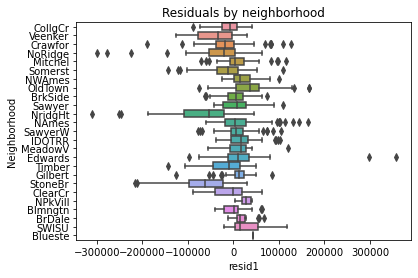

In [52]:
sns.boxplot(data=housedata[['Neighborhood','resid1']], x='resid1', y='Neighborhood').set_title('Residuals by neighborhood');

## More exploration (Read more)
There are some [good ideas here](https://www.dataquest.io/blog/kaggle-getting-started/) so have a look at this and try some things out. Includes information on dummy variables for having nominal data as independent variables.


# Exercise 2: Linear regression to analyse relationships between crimes and socioeconomic characteristics
We will using from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.html), a good resource to find example data sets. The data - **Communities in the US**. combines socio-economic data from the 1990 Census, law enforcement data from the 1990 Law Enforcement Management and Admin Stats survey, and crime data from the 1995 FBI UCR.

We have two versions of the data, [a problematic one with some missing values](https://moodle.city.ac.uk/pluginfile.php/2782683/mod_page/content/5/censusCrime.csv), and a [clean version](https://moodle.city.ac.uk/pluginfile.php/2782683/mod_page/content/5/censusCrimeClean.csv) where the problematic columns have been removed. Detailed information on column names [can be found here](https://moodle.city.ac.uk/pluginfile.php/2782683/mod_page/content/5/communitiesNames.txt).

The original the data was to help determine relationships between crime statistics and socio-economic variables.

There are some alternative regression libraries you can try if you like in this exercise.

## Simple Linear Regression
1. **Load Data**. Load the [Communities in the US (cleaned version)](https://moodle.city.ac.uk/pluginfile.php/2782683/mod_page/content/5/censusCrimeClean.csv) into a Pandas dataframe.
2. **Choose two columns and save as variables**. You can choose any but an interesting pair could be "medIncome" and "ViolentCrimesPerPop".
3. **Choose suitable variables**. Use the [information here](https://moodle.city.ac.uk/pluginfile.php/2782683/mod_page/content/5/communitiesNames.txt) to help identify one dependent and one independent variable.
4. **Fit a model and inspect the parameters**. Fit a simple linear regression model using either scikit (see above) or `scipy.stats.linregress()` function to perform a linear regression. Show the model parameters produced.
5. **Calculate a regression line**. Use Numpy's `polyval()` function to calculate a regression line. The code below will calculate dependent variable values for each independent variable value.  
    Then plot it on a scatterplot.
6. **Comment on the model**. You might also try to fit a seond-order polynomial function that might describe the shape better.

In [ ]:
# Code 5
modelledDependent = np.polyval([slope, intercept], independentColumn)

In [ ]:
# Code 6
pCoeff = np.polyfit(column1, column2, 2)
evaluatedCurve = np.polyval(pCoeff, column1)

In [3]:
census = pd.read_csv('censusCrimeClean.csv')

In this case, we're looking to model crimes using socioeconomic data, so your *dependent variable* will be "ViolentCrimesPerPop" and your *dependent variable* will be "medIncome".

*Note* that `medIncome` may not be the best to use as it's not one of the most correlated variables (might be best to use `PctTeen2Par`). However, in analysis, we may have *other* reasons why we might want to include this. We'll include this variable later.

In [58]:
# Choose the data
medIncome=census["medIncome"];
violentCrimesPerPop=census["ViolentCrimesPerPop"];

# We first use the linear regression from scipy library which
# turns 4 values. We save all the results in variables
# Notice that in addition to the slope, we also get the intercept of the line
slope, intercept, r_value, p_value, std_err = stats.linregress(medIncome, violentCrimesPerPop)

print ("Slope: ", slope)
print ("Intercept: ", intercept)
print ("p_value: ", p_value)
print ("std_err: ", std_err)

Slope:  -0.4720854929583652
Intercept:  0.4084600410077531
p_value:  6.334424808053117e-88
std_err:  0.022578802568586777


The slope indicates that the model says that for every increase of 1 in income, the crime goes down by 0.47 of a unit (in its units - crimes per head). However, note that these are not in the original units, so you can't directly quantitatively relate to the original concepts.

You can do it directly from the slope and intercept paramters (this demonstrates how simple the idea of simple linear regression is!)

Using `np.polyval()` as suggested in the lab is unnecessary, as it's a linear equation.

Either:
1. Calculate 2 points, directly from the parameters
2. Calculate every y (dependent variable value) from every x (independent variable value, directly from the parameters
3. Use `np.polyval()`

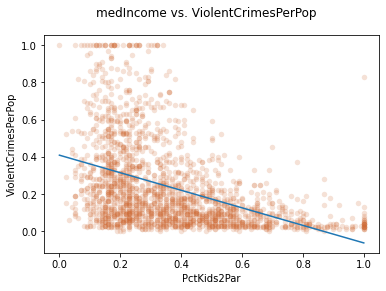

In [64]:
# Method 1: Calculate 2 points directly from the parameters
x1=medIncome.min() #min value of the independent variable
x2=violentCrimesPerPop.max() #max value of the independent variable
y1=x1*slope + intercept #calculate the dependent variable value from x1
y2=x2*slope + intercept #calculate the dependent variable value from x2

# Plot a scatterplot as before
plt.suptitle('medIncome vs. ViolentCrimesPerPop')
plt.xlabel('PctKids2Par')
plt.ylabel('ViolentCrimesPerPop')
plt.scatter(medIncome,violentCrimesPerPop , c = "#D06B36", s = 30, alpha = 0.2, linewidth=0)
# Overlay the modelled line (all three will be on top of each other)
plt.plot([x1,x2],[y1,y2])

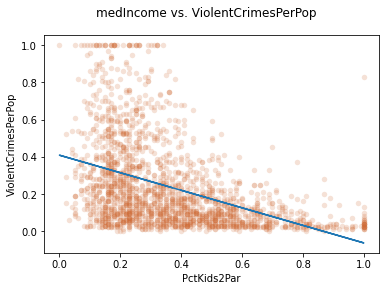

In [68]:
# Method 2: Calculate every y (dependent variable value) from every x
#(independent variable value, directly from the parameters
modelledDependentMethod2  = medIncome*slope + intercept

# Plot a scatterplot as before
plt.suptitle('medIncome vs. ViolentCrimesPerPop')
plt.xlabel('PctKids2Par')
plt.ylabel('ViolentCrimesPerPop')
plt.scatter(medIncome,violentCrimesPerPop , c = "#D06B36", s = 30, alpha = 0.2, linewidth=0)
# Overlay the modelled line (all three will be on top of each other)
plt.plot(medIncome, modelledDependentMethod2)

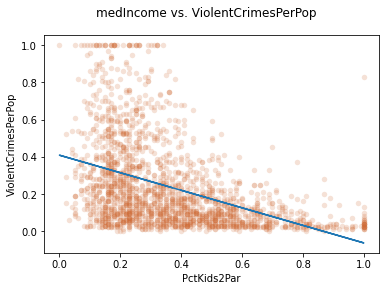

In [70]:
# Method 3: this was the suggested method in the practical, but is unnecessary,
# Because it's linear, so you only need 2 points)
modelledDependentMethod3  = np.polyval([slope, intercept], medIncome)

# Plot a scatterplot as before
plt.suptitle('medIncome vs. ViolentCrimesPerPop')
plt.xlabel('PctKids2Par')
plt.ylabel('ViolentCrimesPerPop')
plt.scatter(medIncome,violentCrimesPerPop , c = "#D06B36", s = 30, alpha = 0.2, linewidth=0)
# Overlay the modelled line (all three will be on top of each other)
plt.plot(medIncome, modelledDependentMethod3)

Visually, the line does not seem to fit well. This is because it's probably not a linear relationship. You can try fitting a polynomial curve. We'll try to fit a second-order curve. And here we do need to use `np.polyval()`. Most of you will have seen that the appeared to be filled in - I now realise this is because the lines joining the xs and calculated ys were not ordered, so jumping about all over the place. A solution is to sort the xs first.

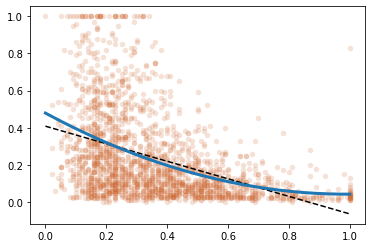

In [75]:
# Fit a second-order curve
pCoeff = np.polyfit(medIncome, violentCrimesPerPop, 2)

# Sort them, so the curve looks like a curve when drawn
xs = np.sort(medIncome)

# Calculate value for each of these using the polynomial
ys = np.polyval(pCoeff, xs)

# Plot the data values
plt.scatter(medIncome, violentCrimesPerPop, c = "#D06B36", s = 30, alpha = 0.2, linewidth=0)

# Plot the linear "curve" - make is dashed
plt.plot([x1,x2],[y1,y2], "k--")

# Plot the second order polynomal curve
plt.plot(xs, ys, linewidth = 3, fillstyle="none")

## Multiple Linear Regression
As you know, phenomena are often affected by multiple factors. If you know what these multiple factors are likely to be, and have data that represent them, multiple regression will likely produce a better fit.

1. Build a multiple regression model. Either use scikit (see above) or try the [OLS function](http://statsmodels.sourceforge.net/devel/generated/statsmodels.regression.linear_model.OLS.html) in `statsmodels` to perform a multiple regression operation and comment on the results. Note that you first model and fit the model to your data (this is using the `statsmodels` example).  
`model = sm.OLS(dependent,independents)`  
`results = model.fit()`  
    Your independent variables will need to be in a list or array. Use the following to get a text description of your results (this example below is using the statsmodels example)
`results.summary()`
2. **(OPTIONAL)**: `statsmodels` also has an R-style syntax you can use that some people like. See the resource here and repeat.

In [8]:
# Pick variables
dependent = census["ViolentCrimesPerPop"]
independents = census[["medIncome", "PctTeen2Par"]]

# Add a column of ones (1) to an array.
independents_withconst = sm.add_constant(independents)

# Use the OLS function from statsmodels
model = sm.OLS(dependent,independents_withconst)
results = model.fit()

# Check the result
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.438
Model:                             OLS   Adj. R-squared:                  0.437
Method:                  Least Squares   F-statistic:                     775.3
Date:                 Fri, 02 Dec 2022   Prob (F-statistic):          1.01e-249
Time:                         16:38:58   Log-Likelihood:                 650.16
No. Observations:                 1994   AIC:                            -1294.
Df Residuals:                     1991   BIC:                            -1278.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7065      0.013     56.172      0.000       0.682       0.731
medIncome      -0.0162      0.024     -0.673      0.501      -0.063       0.031
PctTeen2Par    -0.7938      0.026    -30.219      0.000      -0.845      -0.742
==============================================================================
Omnibus:                      312.917   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              604.653
Skew:                           0.956   Prob(JB):                    5.03e-132
Kurtosis:                       4.904   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Have a look at [this page](http://www.datarobot.com/blog/ordinary-least-squares-in-python/) for a discussion on the values returned by the summary() function. With multiple regression, the variables interact, so we need to interpret them accordingly.

> The estimated rate of change of the conditional mean of "ViolentCrimesPerPop" (Y) with respect to "medIncome", when "PctTeen2Par" is fixed,  is between -0.163 and -0.031 units (i.e., the confidence interval). 

But remember that these don't directly relate to the original units, because the data have been normalised. However, because they are normalised, we can make direct comparisons with the coefficients. `PctTeen2Par` has a bigger effect on the model that `MedianIncome`. This is not surprising as we have already seen the `PctTeen2Par` is the most correlated.

We can calculate the crimes directly, in the same way as before. Or we can use the `predict()` method. We can get the `params` and call the `predict()` function from the model `results`.

We can't plots these as a line in 2D as before, because it's a line in 3D space. But we can calculate residuals (difference between modelled and actual crimes) and plot them as histograms.

Here, we calculate them manually using both prediction calculation methods and using `results.resid`. All three are equivalent and give the same answer.

In [11]:
# Checkout the params
results.params

const          0.706495
medIncome     -0.016172
PctTeen2Par   -0.793770
dtype: float64

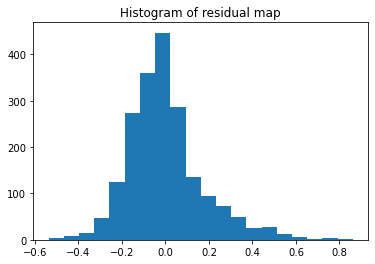

In [13]:
#Calculating dependent variable values from the predict method
modelledDependentOLSPredict  = results.predict()

# Calculating dependent variable values from parameters directly (don't recommend this)
# modelledDependentOLSDirect  = census['medIncome']*results.params['medIncome'] + census['PctTeen2Par']*results.params['PctTeen2Par'] + results.params['const']

#Calculate the residuals
residuals=results.resid

# Calculate the residuals manually (don't recommend this)
# residualsDirect=dependent-modelledDependentOLSDirect
# residualsPredict=dependent-modelledDependentOLSDirect

# Plot the residual
plt.hist(residuals, 20)
plt.title("Histogram of residual map")
plt.show()

So most of the residuals are within around +/- 0.3. This means that the crimes are mostly under/over reported within around +/- 0.3. Are these residuals big (indicating a poor model) or small (indicating a good model?

Such effect sizes need to be considered within the original context of the data. However, remember that these data are not in the original units. So it might be worth considering in the context of the varition of the crime data.

In [14]:
# Check standard deviation of dependent
dependent.std()

0.2329849017279638

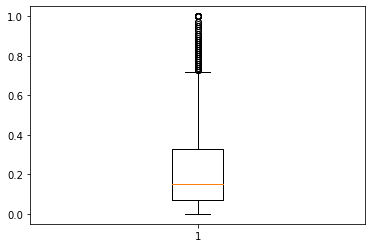

In [15]:
plt.boxplot(dependent);

As discussed, these data are not in the original meaningful units - they are range-normalised to between 0-1, and has a standard deviation of 0.23. This gives you the text with which to consider your answer. These residuals are quite large, but not really large, indicating that it describes at least some of the variation in the data.

This is confirmed with more standard measures that you can extract from `results`.

In [16]:
print("R-squared:",results.rsquared)
print("MSE model:",results.mse_model)
print("MSE residuals:",results.mse_resid)
print("MSE total:",results.mse_total)

R-squared: 0.43781818848568776
MSE model: 23.682451625908875
MSE residuals: 0.030546987374951425
MSE total: 0.05428196443318918


The r-squared is quite high indicating a reasonable model. Again, see [this page](http://www.datarobot.com/blog/ordinary-least-squares-in-python/) for how to interpret these things.


### Same thing but written in R-style
This is just an alternative way of specifying a model.

In [19]:
# This method uses R style patsy formulas to indicate the relations
model2 = sm.formula.ols(formula='ViolentCrimesPerPop ~ medIncome + PctTeen2Par', data=census, hasconst = False)
results2 = model2.fit()

# Check results
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared (uncentered):                   0.725
Model:                             OLS   Adj. R-squared (uncentered):              0.725
Method:                  Least Squares   F-statistic:                              1749.
Date:                 Fri, 02 Dec 2022   Prob (F-statistic):                        0.00
Time:                         16:57:17   Log-Likelihood:                          650.16
No. Observations:                 1994   AIC:                                     -1294.
Df Residuals:                     1991   BIC:                                     -1278.
Df Model:                            3                                                  
Covariance Type:             nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.7065      0.013     56.172      0.000       0.682       0.731
medIncome      -0.0162      0.024     -0.673      0.501      -0.063       0.031
PctTeen2Par    -0.7938      0.026    -30.219      0.000      -0.845      -0.742
==============================================================================
Omnibus:                      312.917   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              604.653
Skew:                           0.956   Prob(JB):                    5.03e-132
Kurtosis:                       4.904   Cond. No.                         10.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Exercise 3: Logistic regression to analyse Titanic survival
When the variable that we are trying to predict is binary (or categorial) variable, logistic regression may be suitable.

Here, we will try to build a model that aims to estimate the survival rates using the Titanic survival data set. We want to understand how important the characteristic of the people involved in explaining survival. We will be building a predictive model to help in our analysis.

We used this dataset ([Titanic Survival Dataset](https://moodle.city.ac.uk/pluginfile.php/2782683/mod_page/content/5/titanicDataFull.csv)) already when considering missing values in week 2. We will have the binary `survival` column as our dependent variable.

Here are the variable meta-data:

`Survived` - Survival (0 = No; 1 = Yes)  
`Pclass` - Passenger Ticket Class (1 = 1st; 2 = 2nd; 3 = 3rd)  
`Name` - Name  
`Sex` - Sex  
`Age` - Age  
`SibSp` - Number of Siblings/Spouses Aboard  
`Parch` - Number of Parents/Children Aboard  
`Ticket` - Ticket Number  
`Fare` - Passenger Fare (British pound)  
`Cabin` - Cabin Number  
`Embarked` - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)  

There is more [information on Kaggle](https://www.kaggle.com/c/titanic/data) where this data was sourced.

By now, you know how to approach the modelling process from the start to the finish but here are some guiding steps:

1. Start by identifying your dependent and independent variables by reflecting on the features, what are you trying to model, which features could prove to be irrelevant, which features would you expect to play a role, do you foresee any inderdependencies?
2. Have a look into all the variables and check for issues, e.g., missing values.
3. Discard features with significant data quality issues and try to resolve the missing value issues.
4. Consider generating and adding dummy variables by encoding variables as binary columns. Pandas has a good function to help with that: [pandas.get_dummies()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
5. Consider normalising some of your features
6. Look for covariation in your features and check if there are redundancies, drop features if needed and comment on implications.
7. When you are happy with your data, you can split into train / test and run the models. For educational purposes, you can try to use both the [statsmodels](http://www.statsmodels.org/dev/generated/statsmodels.discrete.discrete_model.Logit.html) and [scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) versions of logistic regression.
8. You can evaluate your model using diagnostic measures such as confusion matrices (using some [helper functions](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)) or the summary output of statsmodels (More on this in Week-08):

In [ ]:
logit_sm = sm.Logit(y_train, X_train)
# fit the model
result = logit_sm.fit()
# Let's use the very nice summary function of statsmodels
# This is informing us about the model fit. 
# Pseudo R-squ. is a measure to look into and informing us on the overall fit.
print (result.summary())

9. Have a close look at the coefficients and what they tell you regarding the characteristics of the survivors. Do they make sense, do they tell you a story? This is the understanding/explanatory power of models.

In [2]:
# Load data
titanic = pd.read_csv('titanicDataFull.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


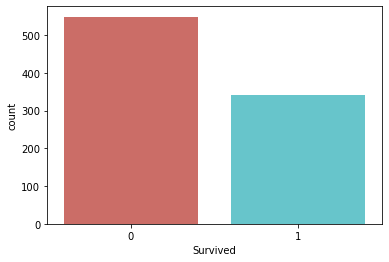

In [27]:
# Exploratory
sns.countplot(x='Survived',data=titanic, palette='hls')
plt.show()

In [28]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [29]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Cabin and Age have missing values. Cabin has 687 (of 891) missing values, so better exclude from the analysis. We can also make a judgement to drop `PassengerId`,`Name`,`Ticket` as they cannot contribute to this analysis semantically.

In [3]:
titanic.drop(columns=['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


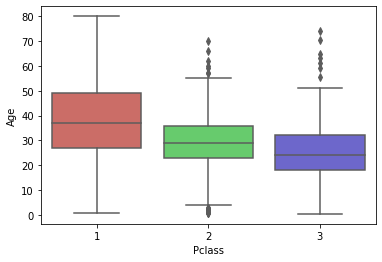

In [40]:
sns.boxplot(x='Pclass', y='Age', data=titanic, palette='hls')
plt.show()

There seems to be a dependency between age and class, so let's use class to impute missing age values. (This is just an analytical judgement call!)

In [4]:
groupAverages = titanic.groupby(['Pclass'])['Age'].mean()
groupAverages

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [5]:
# Create function to fill in null values with mean
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]  
    
    if pd.isnull(Age):
        if Pclass == 1:
            return groupAverages[1]
        elif Pclass == 2:
            return groupAverages[2]
        else:
            return groupAverages[3]
    else:
        return Age

In [6]:
# Apply the function
titanic['Age'] = titanic[['Age', 'Pclass']].apply(age_approx, axis=1)

# Check if there is any null
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

There are still null(s), but it is the minority, so we'll drop them

In [7]:
# Drop
titanic.dropna(inplace=True)

# Check again
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

OK, now we're ready!

Let's start preparing the variables. We need to create dummy variables for the categorical ones.

In [8]:
# Here, we need to create dummies for the categorical variables, for Sex and Embarked
gender = pd.get_dummies(titanic['Sex'],drop_first=True, prefix='sex_')
gender.head()

,sex__male
0,1
1,0
2,0
3,0
4,1


In [9]:
embark_location = pd.get_dummies(titanic['Embarked'],drop_first=True, prefix='Embarked_')
embark_location.head()

,Embarked__Q,Embarked__S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [10]:
# Since we added the dummy variables, we drop the originals
titanic.drop(['Sex', 'Embarked'],axis=1,inplace=True)

In [11]:
# Add these to our dataframe
titanic_dmy = pd.concat([titanic,gender,embark_location],axis=1)

In [12]:
# Check the data
titanic_dmy

,Survived,Pclass,Age,SibSp,Parch,Fare,sex__male,Embarked__Q,Embarked__S
0,0,3,22.00000,1,0,7.2500,1,0,1
1,1,1,38.00000,1,0,71.2833,0,0,0
2,1,3,26.00000,0,0,7.9250,0,0,1
3,1,1,35.00000,1,0,53.1000,0,0,1
4,0,3,35.00000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.00000,0,0,13.0000,1,0,1
887,1,1,19.00000,0,0,30.0000,0,0,1
888,0,3,25.14062,1,2,23.4500,0,0,1
889,1,1,26.00000,0,0,30.0000,1,0,0


Now, let's do a check for correlation -- this is a step where you can do the analysis with and without this elimination and observe the effects

<AxesSubplot:>

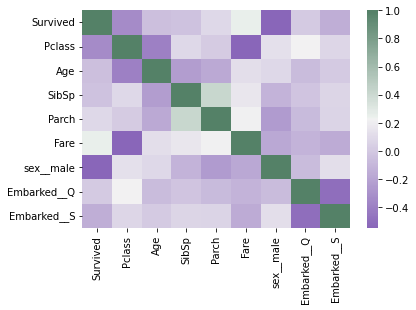

In [13]:
colorMap = sns.diverging_palette(145, 280, s=50, l=50, n=200)
sns.heatmap(titanic_dmy.corr(), cmap = colorMap[::-1]) 

In [14]:
# Fare and PClass are strongly correlated so we decide to drop one
titanic_dmy.drop(['Pclass'],axis=1,inplace=True)

Consider normalising Age and Fare so that the effects of scale is mimimized. You can try with and without this normalisation and observe the impacts on the model.

In [15]:
titanic_dmy['Age']=(titanic_dmy['Age']- titanic_dmy['Age'].min())/(titanic_dmy['Age'].max()-titanic_dmy['Age'].min())
titanic_dmy['Fare']=(titanic_dmy['Fare']- titanic_dmy['Fare'].min())/(titanic_dmy['Fare'].max()-titanic_dmy['Fare'].min())

In [16]:
X = titanic_dmy.iloc[:,[1,2,3,4,5,6,7]]
X

,Age,SibSp,Parch,Fare,sex__male,Embarked__Q,Embarked__S
0,0.271174,1,0,0.014151,1,0,1
1,0.472229,1,0,0.139136,0,0,0
2,0.321438,0,0,0.015469,0,0,1
3,0.434531,1,0,0.103644,0,0,1
4,0.434531,0,0,0.015713,1,0,1
...,...,...,...,...,...,...,...
886,0.334004,0,0,0.025374,1,0,1
887,0.233476,0,0,0.058556,0,0,1
888,0.310639,1,2,0.045771,0,0,1
889,0.321438,0,0,0.058556,1,0,0


In [17]:
y = titanic_dmy.iloc[:,0]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [18]:
# Split to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [19]:
# Create logistic regression object and fit them
LogReg = LogisticRegression(fit_intercept=0)
LogReg.fit(X_train, y_train)
y_pred = LogReg.predict(X_test)

In [20]:
# Create confusion matrix on y_test and y_predicted
confusion_matrix = confusion_matrix(y_test, y_pred)

In [22]:
# View classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       164
           1       0.70      0.67      0.68       103

    accuracy                           0.76       267
   macro avg       0.75      0.74      0.75       267
weighted avg       0.76      0.76      0.76       267



In [23]:
## Let's observe the coefficients -- the best way is to append the names and the coefficients.
## Coefficients tell us about the relation between the variables and the outcome.
## Spot any strong indicators?
coefficients = np.column_stack((np.asarray(titanic_dmy.iloc[:,[1,2,3,4,5,6,7]].columns), LogReg.coef_.flatten()))
print(coefficients)

[['Age' 0.9498577263668522]
 ['SibSp' -0.10146530352097602]
 ['Parch' 0.06086021051337718]
 ['Fare' 3.31288091977827]
 ['sex__male' -2.086053661254162]
 ['Embarked__Q' 0.011230383711128823]
 ['Embarked__S' 0.1486314589007917]]


In [24]:
logit_sm = sm.Logit(y_train, X_train)

# fit the model
result = logit_sm.fit()

# Let's use the very nice summary function of statsmodels
# This is informing us about the model fit. 
# Pseudo R-squ. is a measure to look into and informing us on the overall fit, not really high in this case
result.summary()

Optimization terminated successfully.
         Current function value: 0.484561
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  622
Model:                          Logit   Df Residuals:                      615
Method:                           MLE   Df Model:                            6
Date:                Fri, 02 Dec 2022   Pseudo R-squ.:                  0.2709
Time:                        17:45:55   Log-Likelihood:                -301.40
converged:                       True   LL-Null:                       -413.36
Covariance Type:            nonrobust   LLR p-value:                 1.514e-45
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Age             0.3288      0.520      0.633      0.527      -0.690       1.347
SibSp          -0.2081      0.110     -1.899      0.058      -0.423       0.007
Parch          -0.0756      0.129     -0.586      0.558      -0.329       0.177
Fare            9.8849      1.896      5.214      0.000       6.169      13.600
sex__male      -2.2819      0.210    -10.861      0.000      -2.694      -1.870
Embarked__Q     0.1901      0.365      0.521      0.602      -0.525       0.905
Embarked__S     0.2892      0.225      1.287      0.198      -0.151       0.730
===============================================================================
"""

So those that paid high fares, females and younger people are more likely to survive.